# Grouping students base on entertainment to make better strategy 

## 1. Prerping data for clustering

In [5]:
import pandas as pd
import numpy as np

df = pd.read_excel('../Data/entertainment.xlsx')
df.head()

,name,entertainment,hours_per_week
0,Emily,video_games,5.1
1,Liam,video_games,4.9
2,Olivia,video_games,4.7
3,Noah,video_games,4.6
4,Ava,video_games,5.0


In [7]:
# Check the shape of dataset
df.shape

(600, 3)

In [11]:
# Pivot table for clustering
df.pivot(index='name',columns='entertainment',values='hours_per_week').reset_index()

entertainment,name,books,movies,tv_shows,video_games
0,Aaliyah,0.5,1.5,4.6,4.9
1,Abigail,NaN,1.4,4.5,4.8
2,Addison,0.5,1.6,4.5,5.0
3,Adeline,3.5,4.4,4.5,6.6
4,Alana,2.8,3.9,3.8,5.6
...,...,...,...,...,...
145,Winifred,5.2,5.4,4.6,6.9
146,Xanthe,6.0,5.6,4.6,6.7
147,Zara,5.5,6.7,5.7,7.7
148,Zoe,NaN,1.5,6.1,5.2


In [13]:
# set new data frame and fillna = 0, Nan means they don't spend any hours for this entertainment
model = df.pivot(index='name',columns='entertainment',values='hours_per_week').reset_index().fillna(0)
model.head()

entertainment,name,books,movies,tv_shows,video_games
0,Aaliyah,0.5,1.5,4.6,4.9
1,Abigail,0.0,1.4,4.5,4.8
2,Addison,0.5,1.6,4.5,5.0
3,Adeline,3.5,4.4,4.5,6.6
4,Alana,2.8,3.9,3.8,5.6


In [15]:
# check Nan again
model.isna().sum()

entertainment
name           0
books          0
movies         0
tv_shows       0
video_games    0
dtype: int64

In [17]:
# check duplicate
model.duplicated().sum()

0

In [19]:
# check type (Because unsupervised learning for clustering only allowing numeric values)
model.dtypes

entertainment
name            object
books          float64
movies         float64
tv_shows       float64
video_games    float64
dtype: object

In [21]:
# remove name so we can apply Unsupervised learning model, later we will include name.
model_ml = model.drop(columns='name')

In [23]:
model_ml.head()

entertainment,books,movies,tv_shows,video_games
0,0.5,1.5,4.6,4.9
1,0.0,1.4,4.5,4.8
2,0.5,1.6,4.5,5.0
3,3.5,4.4,4.5,6.6
4,2.8,3.9,3.8,5.6


In [25]:
model_ml.describe()

entertainment,books,movies,tv_shows,video_games
count,150.000000,150.000000,150.000000,150.000000
mean,2.993333,3.758000,4.586000,5.843333
std,1.917761,1.765298,0.645587,0.828066
min,0.000000,1.000000,3.000000,4.300000
25%,0.800000,1.600000,4.200000,5.100000
50%,3.200000,4.350000,4.500000,5.800000
75%,4.500000,5.100000,4.900000,6.400000
max,6.200000,6.900000,6.600000,7.900000


In [38]:
# We don't need to scale our dataset because number are not too different. But I will do it in here!!
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
standardize = std_scaler.fit_transform(model_ml)
data = pd.DataFrame(standardize, columns=model_ml.columns)

In [40]:
data.head()

entertainment,books,movies,tv_shows,video_games
0,-1.304483,-1.283389,0.021758,-1.143017
1,-1.566077,-1.340227,-0.133658,-1.264185
2,-1.304483,-1.226552,-0.133658,-1.021849
3,0.265082,0.364896,-0.133658,0.916837
4,-0.101150,0.080709,-1.221575,-0.294842


In [42]:
# After scale the feature, we all have a mean of 0 and a standard deviation of 1
data.describe()

entertainment,books,movies,tv_shows,video_games
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,7.549517e-17,-2.575717e-16,-5.155136e-16,-4.233650e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.566077e+00,-1.567576e+00,-2.464909e+00,-1.870024e+00
25%,-1.147526e+00,-1.226552e+00,-5.999085e-01,-9.006812e-01
50%,1.081256e-01,3.364776e-01,-1.336584e-01,-5.250608e-02
75%,7.882703e-01,7.627583e-01,4.880085e-01,6.745011e-01
max,1.677690e+00,1.785832e+00,3.130093e+00,2.492019e+00


## 2. Finding the suitable number of clusters by applying the inertia and silhouette scores

In [44]:
# import kmeans and write a loop to fit models with 2 to 15 clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# create an empty list to hold many inertia and silhouette values
inertia_values = []
silhouette_scores = []

# create 2 - 15 clusters, and add the intertia scores and silhouette scores to the lists
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42) # changed from auto to 10
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_, metric='euclidean', sample_size=None))

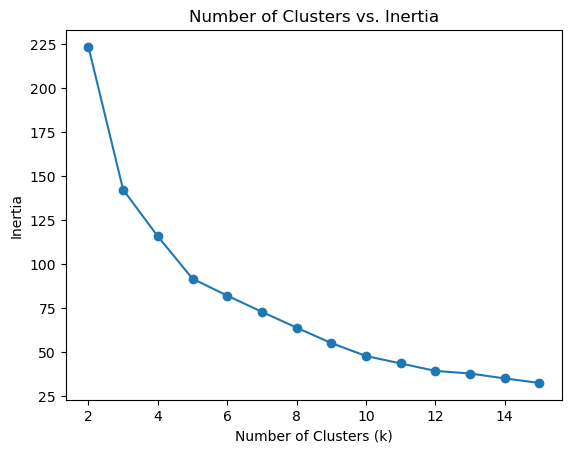

In [46]:
# plot the inertia values
import matplotlib.pyplot as plt

# turn the list into a series for plotting
inertia_series = pd.Series(inertia_values, index=range(2, 16))

# plot the data
inertia_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Number of Clusters vs. Inertia");

From the Inertia scores, we can choose k (number of clusters) = 3 or 4

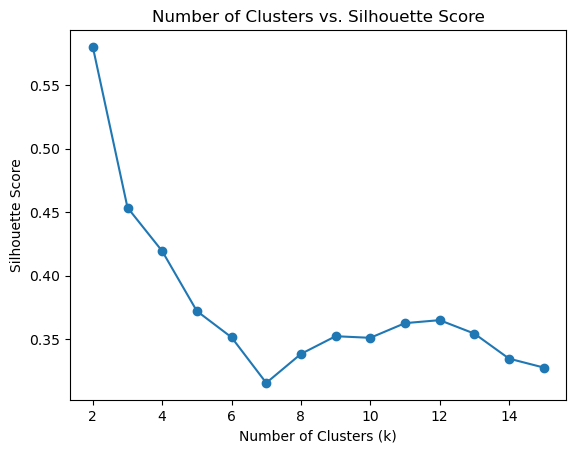

In [49]:
# plot the silhouette scores
# turn the list into a series for plotting
silhouette_series = pd.Series(silhouette_scores, index=range(2, 16))

# plot the data
silhouette_series.plot(marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Number of Clusters vs. Silhouette Score");

From the silhouette score, we can choose k = 3

## 3. Choose the number of clusters and give recommendation:

In [52]:
# fit a kmeans model for the k value that we identified (k=4 first)
kmeans4 = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans4.fit(data)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [54]:
# find the number of students in each cluster
from collections import Counter

Counter(kmeans4.labels_)

Counter({1: 51, 2: 49, 3: 28, 0: 22})

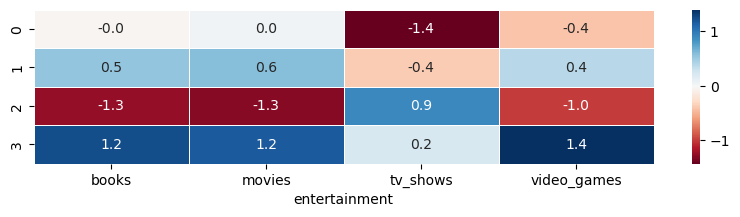

In [56]:
# create a heat map of the cluster centers
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers4 = pd.DataFrame(kmeans4.cluster_centers_, columns=data.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers4, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

 If I choose 4 clusters, I will have 4 groups following below:
- Group 1 (relate to 0): Dislikes TV shows.
- Group 2 (relate to 1): Average preferences.
- Group 3 (relate to 2): Prefers TV shows only.
- Group 4 (relate to 3): Likes all channels.
  
Because index from python starts from 0: (we can understand 1 in real life)

In [62]:
# fit a kmeans model for the k value that we identified (k=3)
kmeans3 = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans3.fit(data)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [64]:
# find the number of students in each cluster
from collections import Counter

Counter(kmeans3.labels_)

Counter({1: 52, 0: 50, 2: 48})

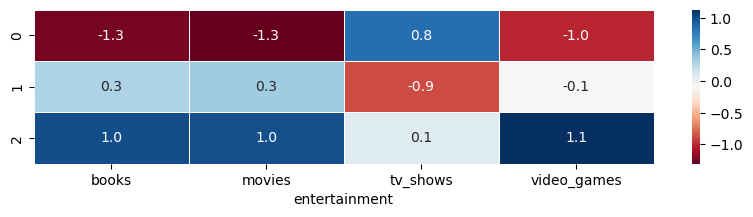

In [70]:
# create a heat map of the cluster centers 3
import seaborn as sns
import matplotlib.pyplot as plt

cluster_centers3 = pd.DataFrame(kmeans3.cluster_centers_, columns=data.columns)

plt.figure(figsize=(10, 2))
sns.heatmap(cluster_centers3, annot=True, cmap="RdBu", fmt=".1f", linewidths=.5);

If I choose k = 3, we have a better information and groups also:
- Group 1: Prefers TV shows; dislikes books and video games.
- Group 2: Likes books and movies; avoids TV shows and video games.
- Group 3: Favors video games and books; neutral on TV shows and movies.

Because index from python starts from 0: (we can understand 1 in real life)

## 4. We concat to our dataset, so the marketing team can see and make better marketing campaign

In [89]:
# We make a dataset with cluster 4 first.
model.head()

entertainment,name,books,movies,tv_shows,video_games
0,Aaliyah,0.5,1.5,4.6,4.9
1,Abigail,0.0,1.4,4.5,4.8
2,Addison,0.5,1.6,4.5,5.0
3,Adeline,3.5,4.4,4.5,6.6
4,Alana,2.8,3.9,3.8,5.6


In [93]:
# make a copy first, to ensure we won't mess anything
data_4 = model.copy()

In [95]:
data_4['Group_number'] = pd.DataFrame(kmeans4.labels_)

In [97]:
# It looks goods, I will add one more columns, so it will be easy for Marketing team to identify 
data_4.head()

entertainment,name,books,movies,tv_shows,video_games,Group_number
0,Aaliyah,0.5,1.5,4.6,4.9,2
1,Abigail,0.0,1.4,4.5,4.8,2
2,Addison,0.5,1.6,4.5,5.0,2
3,Adeline,3.5,4.4,4.5,6.6,1
4,Alana,2.8,3.9,3.8,5.6,0


In [118]:
# prepare a name for group number
group_map = {
    0: "Dislikes TV shows",
    1: "Average preferences",
    2: "Prefers TV shows only",
    3: "Likes all channels"
}

In [107]:
data_4['Group_name']=data_4['Group_number'].map(group_map)

In [109]:
# Now our first dataset with 4 groups is good!
data_4.head()

entertainment,name,books,movies,tv_shows,video_games,Group_number,Group_name
0,Aaliyah,0.5,1.5,4.6,4.9,2,Prefers TV shows only
1,Abigail,0.0,1.4,4.5,4.8,2,Prefers TV shows only
2,Addison,0.5,1.6,4.5,5.0,2,Prefers TV shows only
3,Adeline,3.5,4.4,4.5,6.6,1,Average preferences
4,Alana,2.8,3.9,3.8,5.6,0,Dislikes TV shows


Continue to new dataset for 3 groups

In [112]:
# make a copy first, to ensure we won't mess anything
data_3 = model.copy()

In [114]:
data_3['Group_number'] = pd.DataFrame(kmeans3.labels_)

In [116]:
data_3.head()

entertainment,name,books,movies,tv_shows,video_games,Group_number
0,Aaliyah,0.5,1.5,4.6,4.9,0
1,Abigail,0.0,1.4,4.5,4.8,0
2,Addison,0.5,1.6,4.5,5.0,0
3,Adeline,3.5,4.4,4.5,6.6,2
4,Alana,2.8,3.9,3.8,5.6,1


In [120]:
# prepare a name for group number
group_map_2 = {
    0: "Prefers TV shows; dislikes books and video games",
    1: "Likes books and movies; avoids TV shows and video games",
    2: "Favors video games and books; neutral on TV shows and movies"
}

In [122]:
data_3['Group_name']=data_3['Group_number'].map(group_map_2)

In [124]:
data_3.head()

entertainment,name,books,movies,tv_shows,video_games,Group_number,Group_name
0,Aaliyah,0.5,1.5,4.6,4.9,0,Prefers TV shows; dislikes books and video games
1,Abigail,0.0,1.4,4.5,4.8,0,Prefers TV shows; dislikes books and video games
2,Addison,0.5,1.6,4.5,5.0,0,Prefers TV shows; dislikes books and video games
3,Adeline,3.5,4.4,4.5,6.6,2,Favors video games and books; neutral on TV sh...
4,Alana,2.8,3.9,3.8,5.6,1,Likes books and movies; avoids TV shows and vi...


In [132]:
# Try to filter group number = 1
data_3[data_3['Group_number']==0].head(10)

entertainment,name,books,movies,tv_shows,video_games,Group_number,Group_name
0,Aaliyah,0.5,1.5,4.6,4.9,0,Prefers TV shows; dislikes books and video games
1,Abigail,0.0,1.4,4.5,4.8,0,Prefers TV shows; dislikes books and video games
2,Addison,0.5,1.6,4.5,5.0,0,Prefers TV shows; dislikes books and video games
8,Amelia,0.0,1.5,4.6,4.9,0,Prefers TV shows; dislikes books and video games
11,Aria,0.5,1.6,4.8,4.7,0,Prefers TV shows; dislikes books and video games
12,Aubrey,1.0,1.6,5.1,5.0,0,Prefers TV shows; dislikes books and video games
13,Aurora,0.5,1.2,4.8,5.0,0,Prefers TV shows; dislikes books and video games
14,Ava,0.5,1.4,5.4,5.0,0,Prefers TV shows; dislikes books and video games
15,Avery,1.0,1.5,6.6,5.7,0,Prefers TV shows; dislikes books and video games
17,Bella,0.5,1.5,5.1,5.1,0,Prefers TV shows; dislikes books and video games


In [134]:
# Import to find CSV, or Excel and send it to Marketing team
data_3.to_excel('dataset_3_groups.xlsx',index=False,engine='openpyxl')